## I - Import Libraries and Data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
# Load the data
compas_data = pd.read_csv("/content/compas-scores-two-years.csv")

# Display the first few rows
compas_data.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [18]:
compas_data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

## II - Examin the Data

In [19]:
compas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [20]:
compas_data.isna().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [21]:
# Question 1
compas_data['decile_score'].value_counts()

decile_score
1     1440
2      941
4      769
3      747
5      681
6      641
7      592
8      512
9      508
10     383
Name: count, dtype: int64

## III - Clean the data

In [22]:
# Check for duplicates
compas_data.duplicated().sum()

0

In [23]:
# Check for missing values
compas_data.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

In [24]:
# Data types and potential anomalies
compas_data.dtypes

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date      

## IV - Data Vizualization

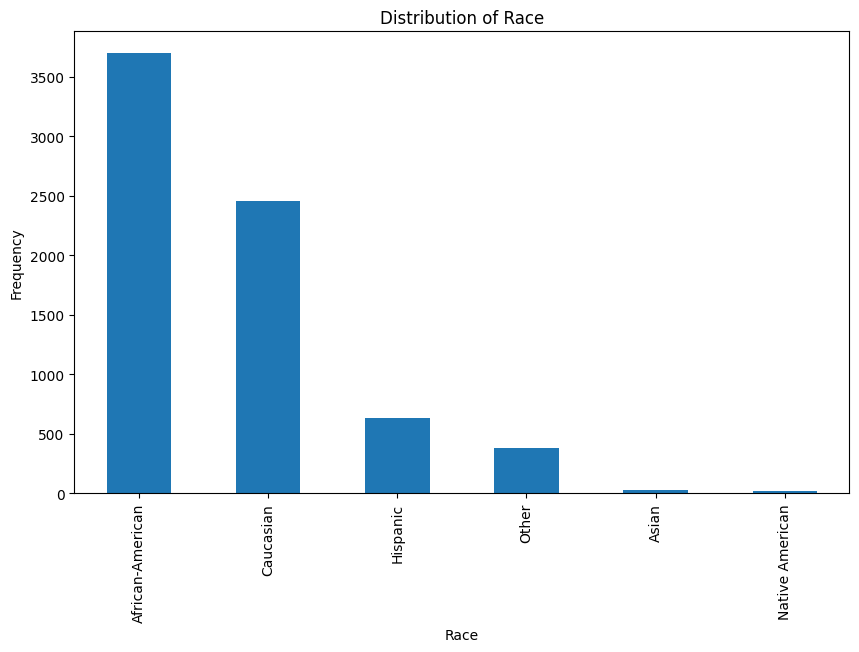

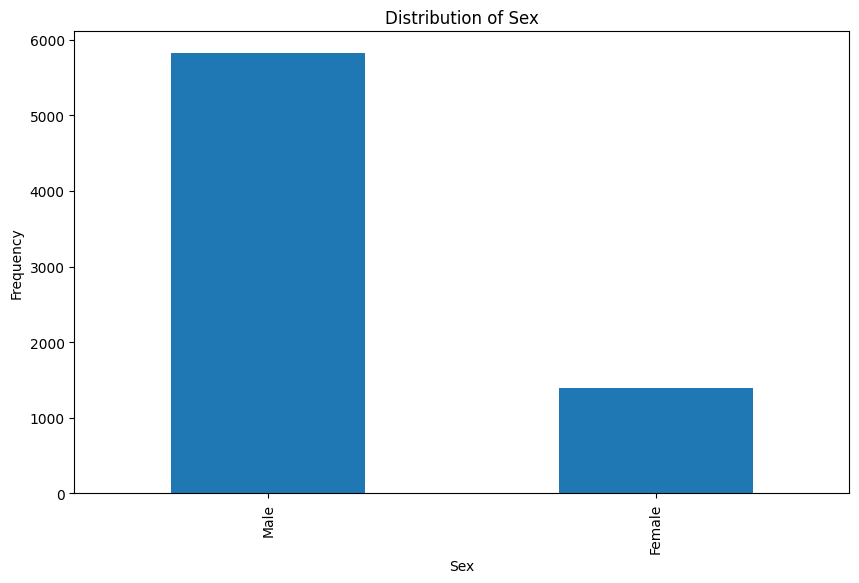

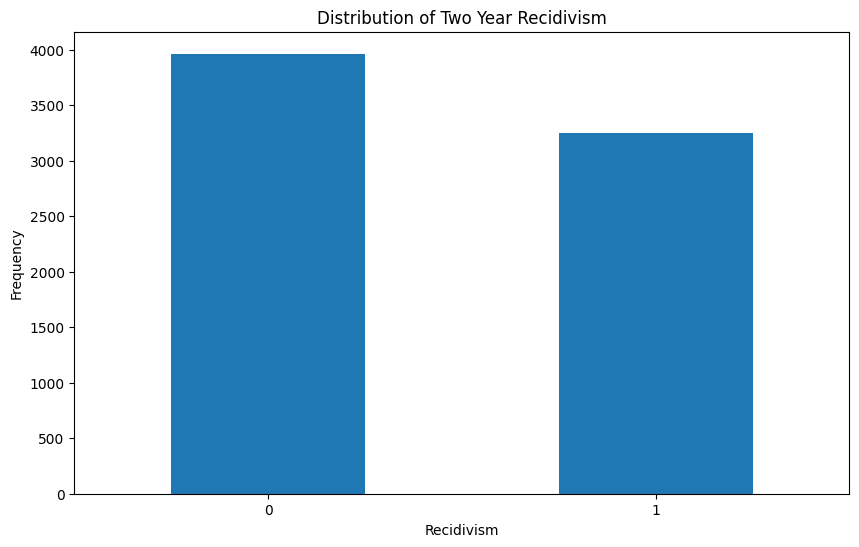

In [25]:
# Distribution of race
plt.figure(figsize=(10, 6))
compas_data['race'].value_counts().plot(kind='bar')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Distribution of sex
plt.figure(figsize=(10, 6))
compas_data['sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Distribution of two_year_recid
plt.figure(figsize=(10, 6))
compas_data['two_year_recid'].value_counts().plot(kind='bar')
plt.title('Distribution of Two Year Recidivism')
plt.xlabel('Recidivism')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

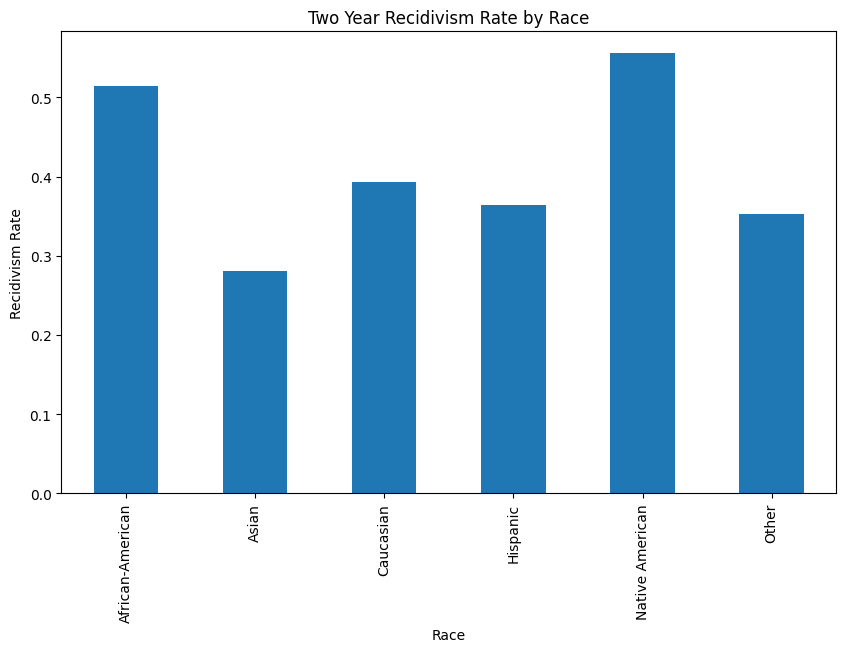

In [26]:
# Recidivism by race
recidivism_by_race = compas_data.groupby('race')['two_year_recid'].mean()
plt.figure(figsize=(10, 6))
recidivism_by_race.plot(kind='bar')
plt.title('Two Year Recidivism Rate by Race')
plt.xlabel('Race')
plt.ylabel('Recidivism Rate')
plt.xticks(rotation=90)
plt.show()

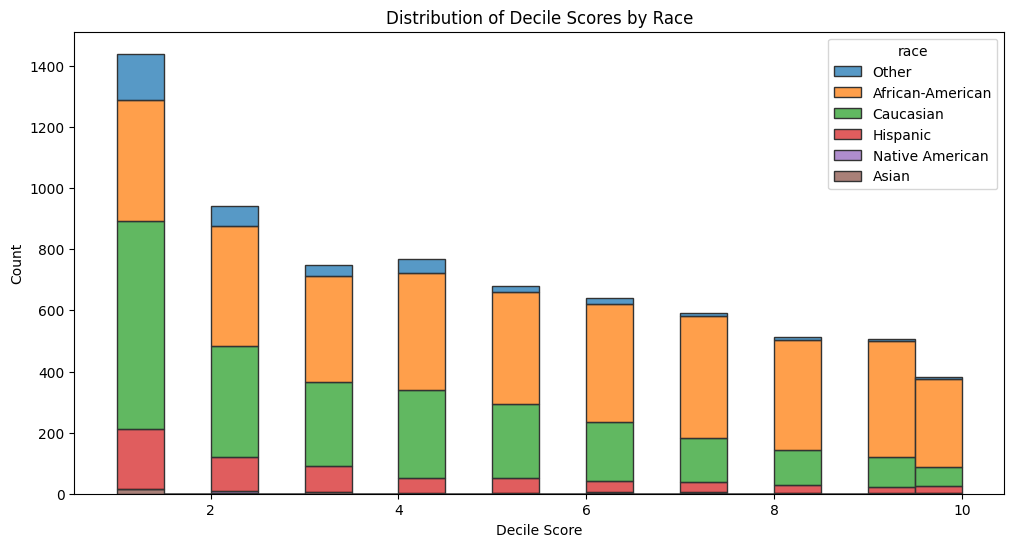

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=compas_data, x='decile_score', hue='race', multiple='stack', edgecolor='.2')
plt.title('Distribution of Decile Scores by Race')
plt.xlabel('Decile Score')
plt.ylabel('Count')
plt.show()

### 1 - Does the risk score predict the outcome?

Correlation between decile_score and is_recid: 0.35233686646617063
Odds Ratios: [1.30264872]


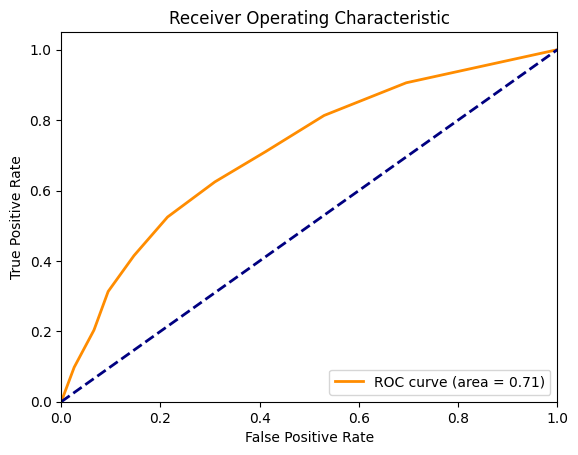

Area Under Curve (AUC): 0.7109550956604013


In [28]:
# Correlation analysis
correlation = compas_data['decile_score'].corr(compas_data['is_recid'])
print(f"Correlation between decile_score and is_recid: {correlation}")

X = compas_data[['decile_score']]  # Predictor
y = compas_data['is_recid']  # Response variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Get coefficients
coefficients = model.coef_[0]  # Coefficients for each feature
intercept = model.intercept_[0]  # Intercept term
odds_ratios = np.exp(coefficients)
print(f"Odds Ratios: {odds_ratios}")

# Predicting probabilities
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Displaying results
print(f"Area Under Curve (AUC): {roc_auc}")

**Interpretation**

- Correlation Coefficient: A correlation coefficient of approximately 0.35 between the decile score and actual recidivism indicates a moderate positive correlation, suggesting higher decile scores are somewhat associated with a higher likelihood of recidivism.

- Odds Ratio: An odds ratio of around 1.30 means that each one-unit increase in the decile score increases the odds of recidivism by about 30%, highlighting its significance as a predictor.

- Predictive Power (ROC and AUC): An AUC of approximately 0.71 from the ROC curve suggests the COMPAS score has good discriminatory power, distinguishing reasonably well between recidivists and non-recidivists.

- Fairness and Demographic Parity: Assessing demographic parity involves comparing positive prediction rates across racial groups; significant differences could indicate the model is biased against certain groups.

**Conclusion**

The COMPAS model demonstrates good predictive power, as evidenced by the correlation coefficient, odds ratios, and AUC.

### 2 - How should we define “high risk”

In [29]:
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 10 + cm[0,1] * 5

In [30]:
def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] + cm[0,1]

# Loop to test different thresholds
score_dict = {}
y_true = compas_data['is_recid']

for t in range(1, 11):
    y_pred = compas_data['decile_score'].apply(lambda x: 1 if x > t else 0)
    score = default_cost(y_true, y_pred)
    score_dict[t] = score

# Find the key with the minimum value
optimal_threshold = min(score_dict, key=score_dict.get)
# Retrieve the minimum value
optimal_cost = score_dict[optimal_threshold]
print(f'The optimal threshold is {optimal_threshold:.1f} with a cost of {optimal_cost}.')

The optimal threshold is 4.0 with a cost of 2508.


We are examining all thresholds and comparing their outcomes to select one that balances false positives and false negatives. This approach can be considered as a consequentialism appraoch, and not deontology.

**Interpretation**

The optimal threshold for defining "high risk" in the COMPAS dataset is 4.0. This threshold minimizes the custom cost function that heavily penalizes false positives and false negatives. This result suggests that individuals with a decile score greater than 4 should be classified as high risk to effectively balance the trade-off between the consequences of false positives and false negatives.

### 3 - Is the algorithm fair to people of different races?

In [31]:
compas_data['race'].value_counts()

race
African-American    3696
Caucasian           2454
Hispanic             637
Other                377
Asian                 32
Native American       18
Name: count, dtype: int64

In [32]:
# logistic regression and ROC curve
X_cau = compas_data[compas_data['race'] == 'Caucasian'][['decile_score']]  # Predictor
y_cau = compas_data[compas_data['race'] == 'Caucasian']['is_recid']  # Response variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cau, y_cau, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting probabilities
y_pred = model.predict(X_test)

# Confusion Matrix
cm_cau = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

In [33]:
# logistic regression and ROC curve
X_aa = compas_data[compas_data['race'] == 'African-American'][['decile_score']]  # Predictor
y_aa = compas_data[compas_data['race'] == 'African-American']['is_recid']  # Response variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_aa, y_aa, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting probabilities
y_pred = model.predict(X_test)

# Confusion Matrix
cm_aa = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)

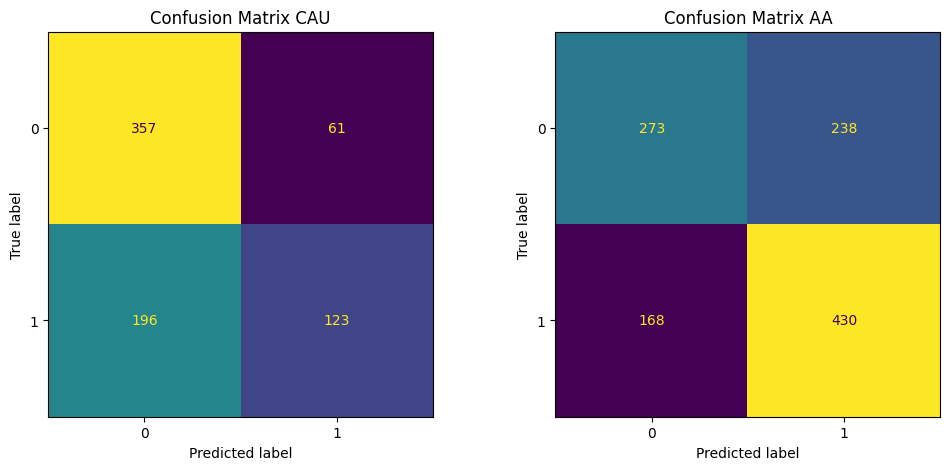

In [34]:
disp_cau = ConfusionMatrixDisplay(confusion_matrix=cm_cau, display_labels=model.classes_)
disp_aa = ConfusionMatrixDisplay(confusion_matrix=cm_aa, display_labels=model.classes_)

# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first confusion matrix
disp_cau.plot(ax=ax[0], colorbar=False)
ax[0].set_title('Confusion Matrix CAU')

# Plot the second confusion matrix
disp_aa.plot(ax=ax[1], colorbar=False)
ax[1].set_title('Confusion Matrix AA')

# Display the plot
plt.show()

**Key Metrics**

- *True Positive Rate (TPR):*
  - TPR (CAU): \(0.385\)
  - TPR (AA): \(0.719\)

- *False Positive Rate (FPR):*
  - FPR (CAU): \(0.146\)
  - FPR (AA): \(0.466\)

**Interpretation**

1. *True Positive Rate (TPR)*: The TPR for African-Americans (\(0.719\)) is significantly higher than for Caucasians (\(0.385\)), indicating the algorithm is more likely to correctly predict recidivism for African-Americans.
   
2. *False Positive Rate (FPR)*: The FPR for African-Americans (\(0.466\)) is significantly higher than for Caucasians (\(0.146\)), suggesting African-Americans are more likely to be incorrectly classified as likely to recidivate.

**Conclusion**

The COMPAS algorithm exhibits disparities in performance across racial groups, with African-Americans facing higher true positive and false positive rates compared to Caucasians. This indicates potential bias, as African-Americans are more likely to be both correctly and incorrectly predicted as recidivists. Consequently, the algorithm does not meet fairness criteria such as demographic parity or equality of opportunity, highlighting the need for bias mitigation.